In [1]:
!pip install simpletransformers
!pip install hnswlib sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.3/316.3 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 84.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 90.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.6 MB/s eta 0:00:00
  

In [2]:
cd /content/drive/MyDrive/2024_2025/MIA

[Errno 2] No such file or directory: '/content/drive/MyDrive/2024_2025/MIA'
/content


In [ ]:
!pip freeze

## Step 1: Obtain probabilities for all member/non-members produced by shadow model

In [ ]:
# import pandas as pd
# from simpletransformers.classification import ClassificationModel,ClassificationArgs
# from util_mia import plotting, input_to_sen_embedding

# # member
# member_olid = pd.read_pickle("data/train_olid_pickle")[:5000] #5k,
# member_hasoc = pd.read_csv("data_shadow/hasoc_train.csv")[:3000][['text','labels']] #member 3k

# # non-member
# nonmember_olid = pd.read_pickle("data/train_olid_pickle")[5000:10000] #5k
# nonmember_hasoc = pd.read_csv("data_shadow/hasoc_train.csv")[3000:][['text','labels']] #2852


# member_olid['tag'] = 'member_olid' # keep the data origin information
# member_olid['membership'] = 1

# member_hasoc['tag'] = 'member_hasoc'
# member_hasoc['membership'] = 1

# nonmember_olid['tag'] = 'nonmember_olid'
# nonmember_olid['membership'] = 0

# nonmember_hasoc['tag'] = 'nonmember_hasoc'
# nonmember_hasoc['membership'] = 0

# attack_data = pd.concat([member_olid,member_hasoc, nonmember_hasoc,nonmember_olid])

# #train_member = pd.concat([member_olid,member_hasoc]).sample(frac = 1, random_state = 1207)


# model = ClassificationModel(
#     "bert", "models/shadow_model")

# from scipy.special import softmax

# result, model_outputs, wrong_predictions = model.eval_model(attack_data[['text','labels']])
# probabilities = []
# probabilities.extend(softmax(model_outputs, axis = 1))
# model_outputs = pd.DataFrame(probabilities, columns=['prob_1', 'prob_2'])

# #attacker_data['prob_1'] = model_outputs['prob_1'] # only keep the second positive probability
# attack_data['prob_2'] = model_outputs['prob_2']
# attack_data.to_pickle('data_shadow/attack_training_data')

## Obtain features for the training of the attacker

In [ ]:
import pandas as pd
import pandas as pd
from util_mia import plotting, input_to_sen_embedding

attack_data = pd.read_pickle('data_shadow/attack_training_data')
df_features = input_to_sen_embedding(attack_data, add_label = True )
df_features['prob_2'] = list(attack_data['prob_2'])
df_features['membership'] = list(attack_data['membership'])

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/352 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

X = df_features.drop(columns = ['membership'])
y = df_features['membership']
LR = LogisticRegression(random_state = 444)

rskf = StratifiedKFold(n_splits=5, shuffle = True, random_state=12451)

## A logistic regression attacker

In [ ]:
from sklearn.metrics import accuracy_score
test_pred_probs = []
test_pred_label = []
gold = []
roc_auc_scores = []
accuracy_scores = []

for train_index, test_index in rskf.split(X,y):
  train_X = X.iloc[train_index]
  train_y = y.iloc[train_index]
  y_true = y.iloc[test_index]

  lr = LogisticRegression(random_state = 444).fit(train_X, train_y)

  y_pred_prob = [x[1] for x in lr.predict_proba(X.iloc[test_index])]
  y_pred_label = lr.predict(X.iloc[test_index])

  roc_auc = roc_auc_score(y_true, y_pred_prob)
  accuracy_scores.append(accuracy_score(y_true,y_pred_label ))

  gold.extend(y_true)
  test_pred_label.extend(y_pred_label)

  test_pred_probs.extend(y_pred_prob)
  roc_auc_scores.append(round(roc_auc,3))

## Classification report; basic statistics; AUC plot

In [ ]:
import statistics
std_dev = statistics.stdev(accuracy_scores)
print(std_dev)
print(classification_report(gold,test_pred_label ))

0.005455411760125185
              precision    recall  f1-score   support

           0       0.61      0.62      0.62      7852
           1       0.62      0.60      0.61      8000

    accuracy                           0.61     15852
   macro avg       0.61      0.61      0.61     15852
weighted avg       0.61      0.61      0.61     15852



ROC-AUC Score: 0.6538668173713703


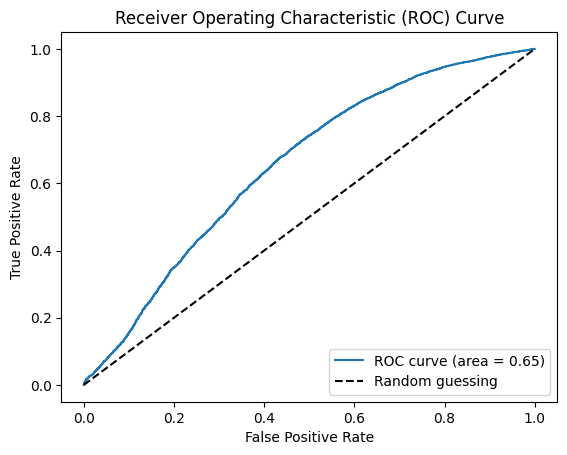

In [ ]:
plotting(gold, test_pred_probs)

Text(0.5, 1.0, 'Membership / Non-membership distribution')

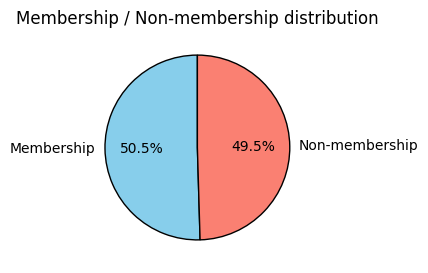

In [ ]:
# Save the model
# import pickle
# with open('models/attack_lg.pkl', 'wb') as file:
#   pickle.dump(model,file)

labels = ['Membership','Non-membership']
counts = [df_features['membership'].value_counts()[1], df_features['membership'].value_counts()[0]]

plt.figure(figsize=(3,3))
plt.pie(counts, labels = labels, autopct = "%1.1f%%", startangle = 90, wedgeprops = {'edgecolor':'black'}, colors = ["skyblue","salmon"])
plt.title('Membership / Non-membership distribution')
